In [51]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('bhp.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [6]:
#df.isna().sum()

## Removing outliers using Percentile

In [4]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [13]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


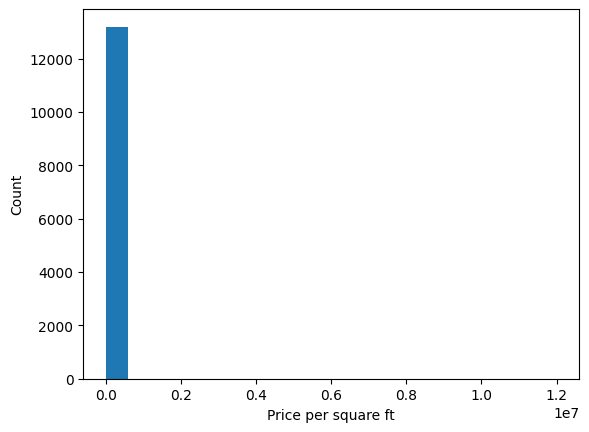

In [17]:
plt.hist(df['price_per_sqft'], bins=20, rwidth=1)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

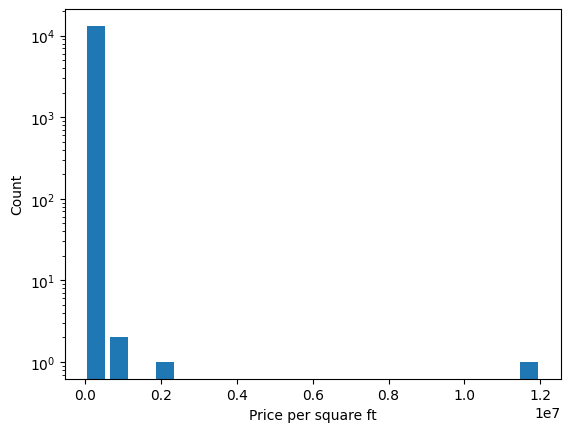

In [18]:
plt.hist(df['price_per_sqft'], bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [7]:
lower, upper = df['price_per_sqft'].quantile([0.001, 0.999])
lower, upper

(1366.184, 50959.36200000098)

In [21]:
df[(df['price_per_sqft'] > upper) | (df['price_per_sqft'] < lower)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [24]:
df1 = df[(df['price_per_sqft'] < upper) & (df['price_per_sqft'] > lower)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [25]:
df.shape

(13200, 7)

In [28]:
df.shape[0] - df1.shape[0]

28

## Removing outliers using Standard Deviation 4

In [43]:
max_std = df1['price_per_sqft'].mean() + 4 * df1['price_per_sqft'].std()
min_std = df1['price_per_sqft'].mean() - 4 * df1['price_per_sqft'].std()

In [44]:
max_std, min_std

(23227.73653589432, -9900.429065502582)

In [45]:
df1[(df1['price_per_sqft'] > max_std) | (df1['price_per_sqft'] < min_std)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [66]:
df2 = df1[(df1['price_per_sqft'] < max_std) & (df1['price_per_sqft'] > min_std)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [67]:
df1.shape[0] - df2.shape[0]

125

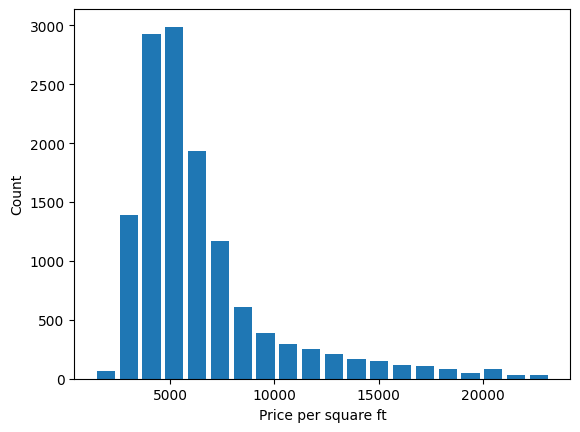

In [68]:
plt.hist(df2['price_per_sqft'], bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

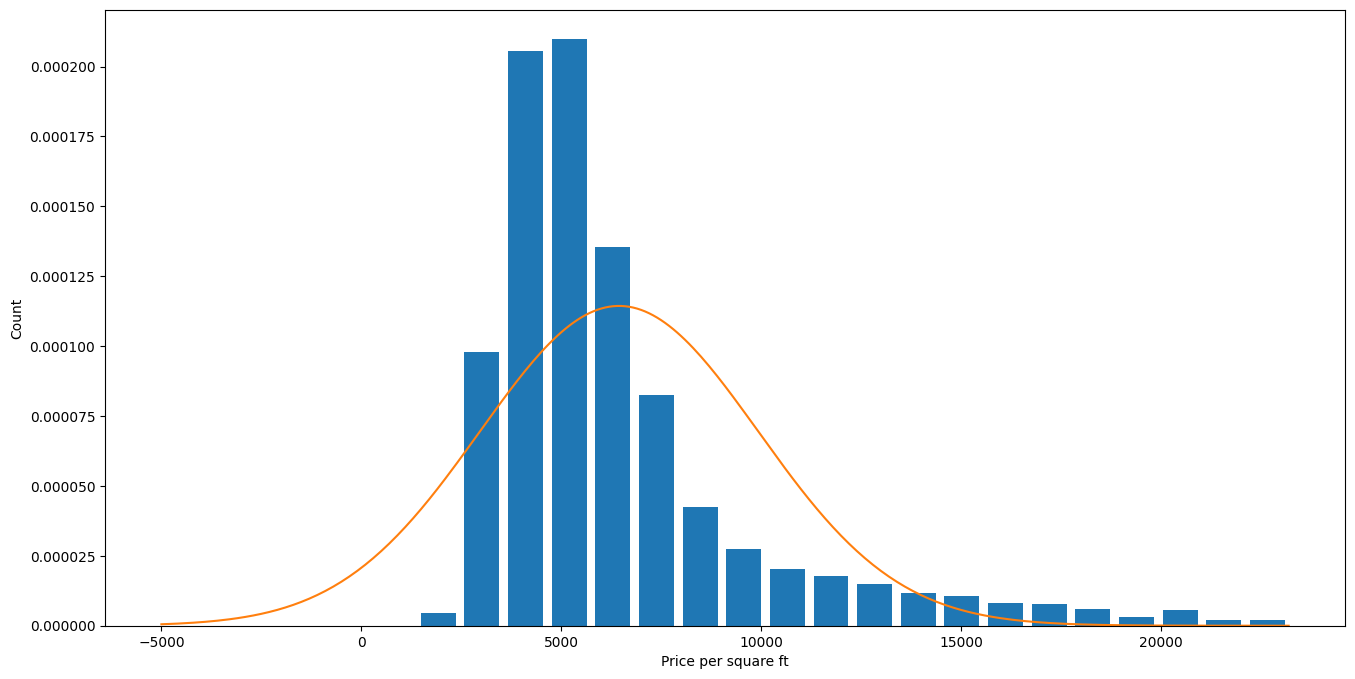

In [69]:
plt.figure(figsize=(16, 8))
plt.hist(df2['price_per_sqft'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Price per square ft')
plt.ylabel('Count')

# Using Stats.Norm
rang = np.arange(-5000, df2['price_per_sqft'].max(), 100)
plt.plot(rang, norm.pdf(rang, df2['price_per_sqft'].mean(), df2['price_per_sqft'].std()))
plt.show()

## Removing outliers using z score. Use z score of 4 for threshold

In [71]:
df2.loc[:, 'z_score'] = (df2['price_per_sqft'] - df2['price_per_sqft'].mean()) / df2['price_per_sqft'].std()
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.068720
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.336615
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.341583
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,1.134761


In [73]:
#df2.isna().sum()

In [77]:
outliers_zscore = df2[(df2['z_score'] < -4) | (df2['z_score'] > 4)]
outliers_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
87,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535,4.612154
408,Mahalakshmi Layout,6 Bedroom,1200.0,7.0,250.0,6,20833,4.124149
429,7th Phase JP Nagar,8 Bedroom,1200.0,8.0,250.0,8,20833,4.124149
475,other,4 BHK,1150.0,4.0,260.0,4,22608,4.633085
925,5th Phase JP Nagar,9 Bedroom,1260.0,11.0,290.0,9,23015,4.749782
...,...,...,...,...,...,...,...,...
12084,Nagarbhavi,5 Bedroom,1200.0,5.0,260.0,5,21666,4.362991
12245,5th Phase JP Nagar,8 Bedroom,1200.0,7.0,250.0,8,20833,4.124149
12321,2nd Stage Nagarbhavi,3 Bedroom,600.0,5.0,135.0,3,22500,4.602119
12368,Koramangala,4 Bedroom,2400.0,5.0,550.0,4,22916,4.721396


In [79]:
df3 = df2[(df2['z_score'] > -4) & (df2['z_score'] < 4)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.068720
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.336615
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.341583
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,1.134761


In [80]:
df2.shape[0] - df3.shape[0]

86